<font color="#CA0032"><h1 align="left">**Redes recurrentes profundas**</h1></font>

<font color="#6E6E6E"><h1 align="left">**Predicción de series temporales**</h1></font>

<h2 align="left">Manuel Sánchez-Montañés</h2>

<font color="#6E6E6E"><h2 align="left">manuel.smontanes@gmail.com</h2></font>

**Notebook: Manuel Sánchez-Montañés**

**Adaptación: Francisco Alvarez**

### **Usaremos un esquema many to one:**

<img src="https://drive.google.com/uc?export=download&id=1iokh576AiK2iFhftPogSBsNXixAi-LBg" align="center" style="float" width="500">

In [ ]:
COLAB = True

## <font color="#CA3532"> **Importar librerías**

In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as R2_score

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os
import random
import numpy as np
import tensorflow as tf


In [ ]:
SEED = 42  # Usa el número que prefieras para fijar la aleatoriedad

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
#la ruta ya está con MI Drive

def download_file_from_google_drive(file_id, dest_file, unzip=False):
  aux = "'https://drive.usercontent.google.com/download?id={}&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280'".format(file_id)
  !wget $aux -O $dest_file
  if unzip:
    !unzip -qq -o $dest_file
    !rm $dest_file

## <font color="#CA3532"> **Carga de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargamos datos con el fichero df_tienda1_procesado

if COLAB:
    download_file_from_google_drive(file_id='1EwoJVsXylUGrP2hga7yNixKv4lH5799U', dest_file='./datos_pasajeros.csv')

data = pd.read_csv('datos_pasajeros.csv')
data.head(20)

--2025-09-09 21:18:29--  https://drive.usercontent.google.com/download?id=1EwoJVsXylUGrP2hga7yNixKv4lH5799U&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49157 (48K) [application/octet-stream]
Saving to: ‘./datos_pasajeros.csv’

./datos_pasajeros.c 100%[===================>]  48.00K  --.-KB/s    in 0.001s  

2025-09-09 21:18:30 (55.4 MB/s) - ‘./datos_pasajeros.csv’ saved [49157/49157]



,day_week,fecha,Sales,Customers,is_open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Year,day_year,day_month,is_weekend,month
0,1,2013-01-01,0.0,0.0,0,0,1,1,1,0,0,2013,1,1,0,0
1,2,2013-01-02,6089.0,781.0,1,0,1,0,0,0,0,2013,2,2,0,0
2,3,2013-01-03,5398.0,689.0,1,0,0,0,0,0,0,2013,3,3,0,0
3,4,2013-01-04,6092.0,724.0,1,0,0,0,0,0,0,2013,4,4,0,0
4,5,2013-01-05,3872.0,467.0,1,0,0,0,0,0,0,2013,5,5,1,0
5,6,2013-01-06,0.0,0.0,0,0,0,0,0,0,0,2013,6,6,1,0
6,0,2013-01-07,8591.0,947.0,1,1,0,0,0,0,0,2013,7,7,0,0
7,1,2013-01-08,7099.0,774.0,1,1,0,0,0,0,0,2013,8,8,0,0
8,2,2013-01-09,6749.0,834.0,1,1,0,0,0,0,0,2013,9,9,0,0
9,3,2013-01-10,6282.0,737.0,1,1,0,0,0,0,0,2013,10,10,0,0


## <font color="#CA3532"> **Librerías y funciones adicionales**

In [ ]:
# cargamos ya desde MI drive Francisco

if COLAB:
    download_file_from_google_drive(file_id='1TolPCESp9uX4YgU3RctmVwo7hTI3FdqG',
                                    dest_file='./my_utils_series_temporales.py.zip', unzip=True)

--2025-09-09 21:18:30--  https://drive.usercontent.google.com/download?id=1TolPCESp9uX4YgU3RctmVwo7hTI3FdqG&export=download&confirm=t&uuid=9699f0e2-e760-49fc-b12e-49f140095280
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010 (2.0K) [application/octet-stream]
Saving to: ‘./my_utils_series_temporales.py.zip’

./my_utils_series_t 100%[===================>]   1.96K  --.-KB/s    in 0s      

2025-09-09 21:18:31 (19.4 MB/s) - ‘./my_utils_series_temporales.py.zip’ saved [2010/2010]



In [ ]:
from my_utils_series_temporales import int2dummy, enventanar, info_enventanado, NAN

In [ ]:
def grafica_entrenamiento(tr_mse, val_mse):
    ax=plt.figure(figsize=(10,4)).gca()
    plt.plot(1+np.arange(len(tr_mse)), tr_mse)
    plt.plot(1+np.arange(len(val_mse)), val_mse)
    plt.title('mse del modelo', fontsize=18)
    plt.xlabel('epoca', fontsize=18)
    plt.ylabel('mse', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## <font color="#CA3532"> **Desarrollo y validación del modelo**

In [ ]:
data.shape

(881, 16)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,4598.876277,2558.973283,0.0,3411.0,5079.0,6389.0,11139.0
Customers,881.0,530.849035,284.254925,0.0,399.0,605.0,737.0,1111.0
is_open,881.0,0.825199,0.380013,0.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.178207,0.382904,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.034052,0.181466,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.022701,0.149035,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0


Hacemos un poco de Feature Eng. para tener valores de -1 a 1 en varias variables y las de embedding de 0 en adelante

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_year = MinMaxScaler()
data["Year_norm"] = scaler_year.fit_transform(data[["Year"]])

In [ ]:
print(data["Year"].min(), data["Year"].max())
print(data["Year_norm"].min(), data["Year_norm"].max())


2013 2015
0.0 1.0


In [ ]:
data["day_month"] = data["day_month"]-1
data["day_month"] = data["day_month"].astype("int32")

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,4598.876277,2558.973283,0.0,3411.0,5079.0,6389.0,11139.0
Customers,881.0,530.849035,284.254925,0.0,399.0,605.0,737.0,1111.0
is_open,881.0,0.825199,0.380013,0.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.178207,0.382904,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.034052,0.181466,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.022701,0.149035,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0


In [ ]:
data["fecha"][0]

'2013-01-01'

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [ ]:
data.set_index("fecha", inplace=True)

In [ ]:
data.head()

,day_week,Sales,Customers,is_open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Year,day_year,day_month,is_weekend,month,Year_norm
fecha,,,,,,,,,,,,,,,,
2013-01-01,1,0.0,0.0,0,0,1,1,1,0,0,2013,1,0,0,0,0.0
2013-01-02,2,6089.0,781.0,1,0,1,0,0,0,0,2013,2,1,0,0,0.0
2013-01-03,3,5398.0,689.0,1,0,0,0,0,0,0,2013,3,2,0,0,0.0
2013-01-04,4,6092.0,724.0,1,0,0,0,0,0,0,2013,4,3,0,0,0.0
2013-01-05,5,3872.0,467.0,1,0,0,0,0,0,0,2013,5,4,1,0,0.0


In [ ]:
print(data.columns)

Index(['day_week', 'Sales', 'Customers', 'is_open', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Year', 'day_year', 'day_month', 'is_weekend', 'month', 'Year_norm'],
      dtype='object')


In [ ]:
# Creación de series (arrays)


fechas     = data.index.values
target     = data["Sales"].to_numpy()
mes        = data["month"].to_numpy()     #es categórica y haremos embedding
dow        = data["day_week"].to_numpy()  #es categórica y haremos embedding
day_month  = data["day_month"].to_numpy() #es categórica y haremos embedding
open_      = data["is_open"].to_numpy()
promo      = data["Promo"].to_numpy()
school     = data["SchoolHoliday"].to_numpy()
sh_0       = data["StateHoliday_0"].to_numpy()
sh_a       = data["StateHoliday_a"].to_numpy()
sh_b       = data["StateHoliday_b"].to_numpy()
sh_c       = data["StateHoliday_c"].to_numpy()
is_weekend = data["is_weekend"].to_numpy()
Year_norm  = data["Year_norm"].to_numpy()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day_week,881.0,3.003405,1.999713,0.0,1.0,3.0,5.0,6.0
Sales,881.0,4598.876277,2558.973283,0.0,3411.0,5079.0,6389.0,11139.0
Customers,881.0,530.849035,284.254925,0.0,399.0,605.0,737.0,1111.0
is_open,881.0,0.825199,0.380013,0.0,1.0,1.0,1.0,1.0
Promo,881.0,0.380250,0.485724,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,881.0,0.178207,0.382904,0.0,0.0,0.0,0.0,1.0
StateHoliday_0,881.0,0.034052,0.181466,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,881.0,0.022701,0.149035,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,881.0,0.006810,0.082291,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,881.0,0.004540,0.067267,0.0,0.0,0.0,0.0,1.0


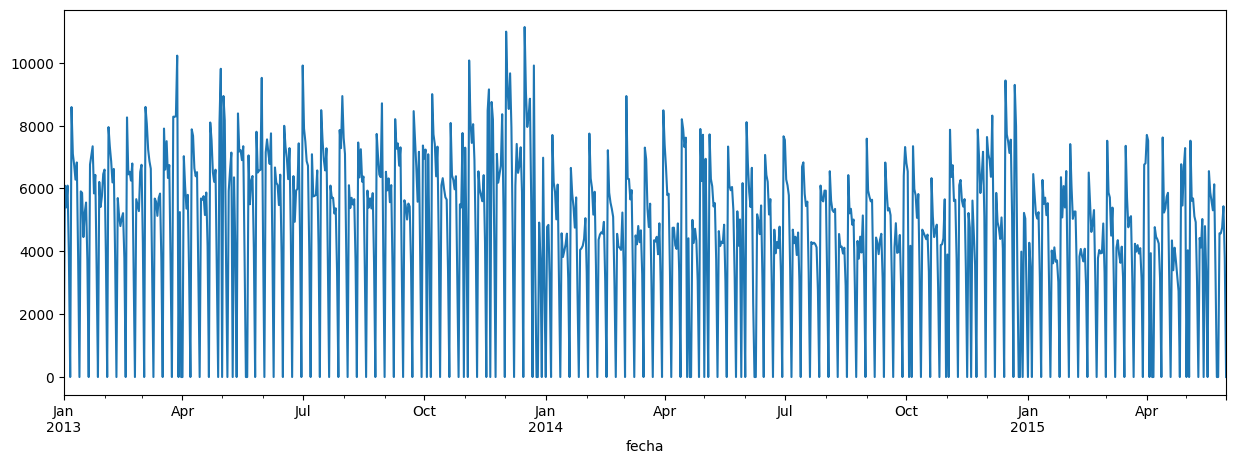

In [ ]:
data["Sales"].plot(figsize=(15,5));

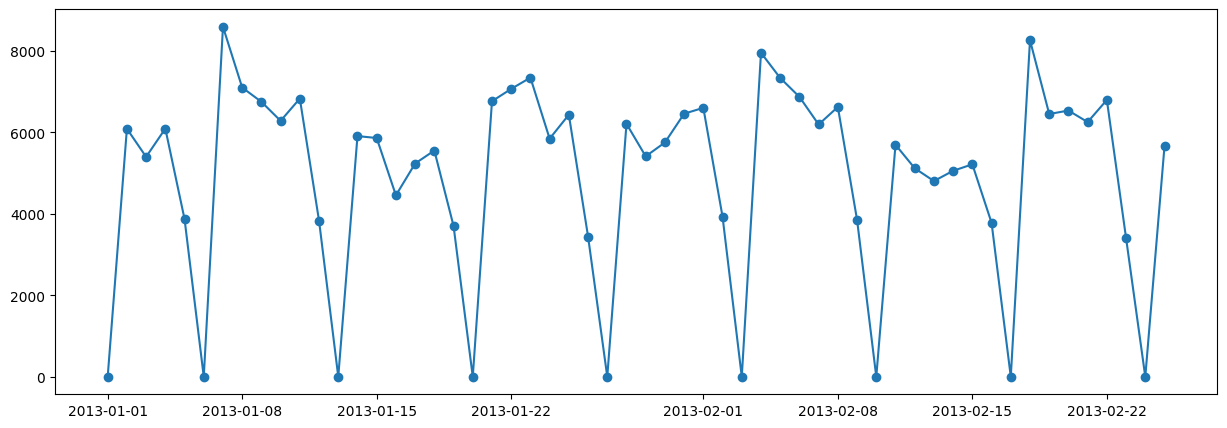

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data["Sales"][:56], "-o");

Estas variables las pasaremos a embedding por eso las dejamos mayores que 1

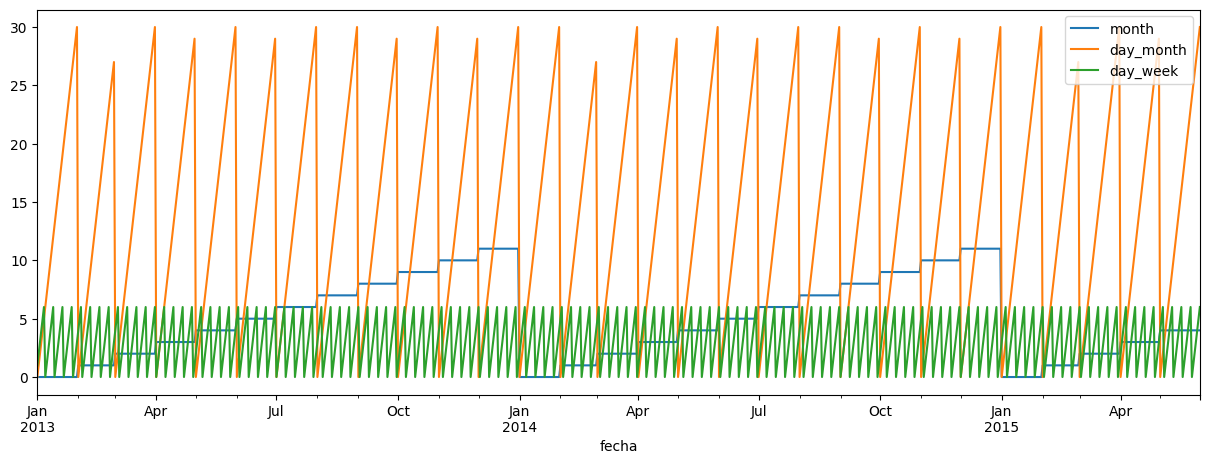

In [ ]:
data[["month", "day_month", "day_week"]].plot(figsize=(15,5));

Declaramos la fecha de corte de train / test para escalar solo con datos de train la variable target = "Sales"

In [ ]:
fecha_corte = data.index[int(0.8*len(data))]
fecha_corte

Timestamp('2014-12-06 00:00:00')

In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[["Sales"]][:fecha_corte])

MinMaxScaler()

In [ ]:
target_transf = scaler.transform(data[["Sales"]])[:,0]
target_transf[:10]


array([0.        , 0.54663794, 0.48460364, 0.54690726, 0.34760751,
       0.        , 0.77125415, 0.63731035, 0.60588922, 0.56396445])

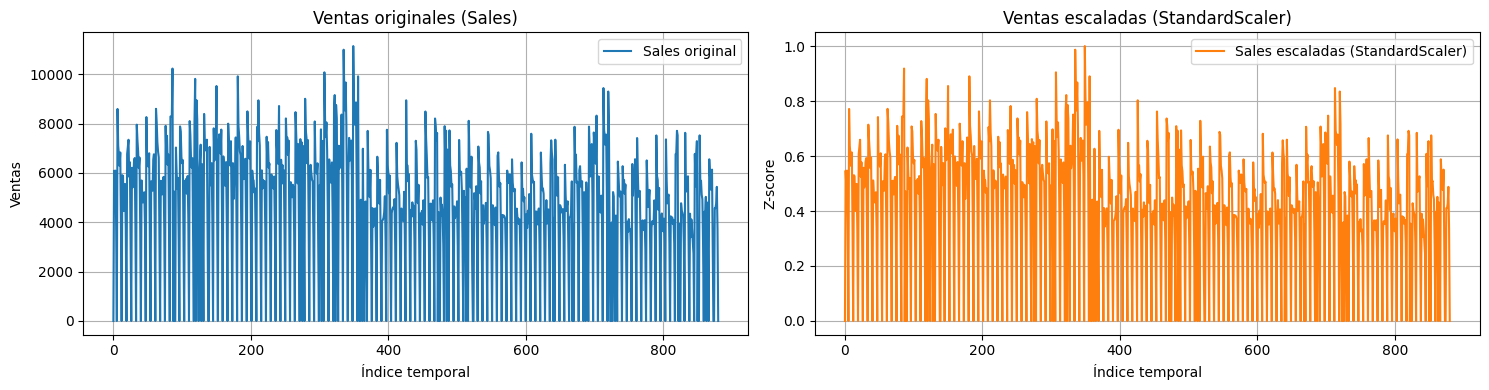

In [ ]:
import matplotlib.pyplot as plt

# Vector original
sales_original = data["Sales"].values

# Vector escalado
sales_scaled = target_transf  # Ya lo has generado con scaler.transform(...)

# Creamos figura
plt.figure(figsize=(15, 4))

# Gráfica original
plt.subplot(1, 2, 1)
plt.plot(sales_original, label="Sales original", color="tab:blue")
plt.title("Ventas originales (Sales)")
plt.xlabel("Índice temporal")
plt.ylabel("Ventas")
plt.grid(True)
plt.legend()

# Gráfica escalada
plt.subplot(1, 2, 2)
plt.plot(sales_scaled, label="Sales escaladas (Scaler)", color="tab:orange")
plt.title("Ventas escaladas (Scaler)")
plt.xlabel("Índice temporal")
plt.ylabel("Z-score")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(sales_scaled.min(), sales_scaled.max())

0.0 1.0


In [ ]:
# prueba enventanado

# series univariables a enventanar:
series = [target_transf, open_, dow]
se_saben_antes = [False, True, True]
nombres_series = ["target_transf", "is_open", "day_week"]

data_window = 14 # lookback (tamaño de la ventana PARA PRUEBA más adelante se puede cambiar solo una vez

X, y = enventanar(series,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes, # si adelanto o no 1 día la información
                  W_in=data_window)

In [ ]:
X.shape

(881, 14, 3)

In [ ]:
y.shape

(881,)

In [ ]:
X[5]

array([[       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan],
       [       nan, 0.        , 1.        ],
       [0.        , 1.        , 2.        ],
       [0.54663794, 1.        , 3.        ],
       [0.48460364, 1.        , 4.        ],
       [0.54690726, 1.        , 5.        ],
       [0.34760751, 0.        , 6.        ]])

In [ ]:
info_enventanado(X[:10], y[:10], nombres_series,
                 nombre_target="target_transf", tiempos=fechas)

10 ventanas creadas

X.shape=(10, 14, 3)  Y.shape=(10,) 

 Ventana 0: 


X[0].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 ?9 
 ?10 
 ?11 
 ?12 
 ?13 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 
 
 
__
 
 Y[0]=0.0 
 
 
   
 2013-01-01 00:00:00 
 
 
 
 
 target_transf 
 0.000000

 Ventana 1: 


X[1].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 ?9 
 ?10 
 ?11 
 ?12 
 2013-01-01T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 
 
 
__
 
 Y[1]=0.5466379387736781 
 
 
   
 2013-01-02 00:00:00 
 
 
 
 
 target_transf 
 0.546638

 Ventana 2: 


X[2].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 ?9 
 ?10 
 ?11 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 
 
 
__
 
 Y[2]=0.48460364485142293 
 
 
   
 2013-01-03 00:00:00 
 
 
 
 
 target_transf 
 0.484604

 Ventana 3: 


X[3].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 ?9 
 ?10 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 
 
 
__
 
 Y[3]=0.5469072627704462 
 
 
   
 2013-01-04 00:00:00 
 
 
 
 
 target_transf 
 0.546907

 Ventana 4: 


X[4].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 ?9 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 
 
 
__
 
 Y[4]=0.3476075051620433 
 
 
   
 2013-01-05 00:00:00 
 
 
 
 
 target_transf 
 0.347608

 Ventana 5: 


X[5].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 ?8 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 0.347608 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 0.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 
 
 
__
 
 Y[5]=0.0 
 
 
   
 2013-01-06 00:00:00 
 
 
 
 
 target_transf 
 0.000000

 Ventana 6: 


X[6].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 ?7 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 2013-01-06T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 0.347608 
 0.000000 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 0.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 
 
 
__
 
 Y[6]=0.7712541520782835 
 
 
   
 2013-01-07 00:00:00 
 
 
 
 
 target_transf 
 0.771254

 Ventana 7: 


X[7].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 ?6 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 2013-01-06T00:00:00.000000000 
 2013-01-07T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 0.347608 
 0.000000 
 0.771254 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 0.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 
 
 
__
 
 Y[7]=0.6373103510189425 
 
 
   
 2013-01-08 00:00:00 
 
 
 
 
 target_transf 
 0.637310

 Ventana 8: 


X[8].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 ?5 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 2013-01-06T00:00:00.000000000 
 2013-01-07T00:00:00.000000000 
 2013-01-08T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 0.347608 
 0.000000 
 0.771254 
 0.637310 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 2.000000 
 
 
 
__
 
 Y[8]=0.6058892180626627 
 
 
   
 2013-01-09 00:00:00 
 
 
 
 
 target_transf 
 0.605889

 Ventana 9: 


X[9].shape=(14, 3) 
 
 
   
 ?0 
 ?1 
 ?2 
 ?3 
 ?4 
 2013-01-01T00:00:00.000000000 
 2013-01-02T00:00:00.000000000 
 2013-01-03T00:00:00.000000000 
 2013-01-04T00:00:00.000000000 
 2013-01-05T00:00:00.000000000 
 2013-01-06T00:00:00.000000000 
 2013-01-07T00:00:00.000000000 
 2013-01-08T00:00:00.000000000 
 2013-01-09T00:00:00.000000000 
 
 
 
 
 target_transf 
 nan 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 0.546638 
 0.484604 
 0.546907 
 0.347608 
 0.000000 
 0.771254 
 0.637310 
 0.605889 
 
 
 is_open 
 nan 
 nan 
 nan 
 nan 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 day_week 
 nan 
 nan 
 nan 
 nan 
 1.000000 
 2.000000 
 3.000000 
 4.000000 
 5.000000 
 6.000000 
 0.000000 
 1.000000 
 2.000000 
 3.000000 
 
 
 
__
 
 Y[9]=0.5639644492324266 
 
 
   
 2013-01-10 00:00:00 
 
 
 
 
 target_transf 
 0.563964

In [ ]:
# Lo anterior era una prueba. Ahora voy a enventanar cada
# variable por separado, porque las voy a tratar por separado
# en mi red  podría si quiero poner "en MAYUSC"


series0         = [target_transf]
se_saben_antes0 = [False]
nombres_series0 = ["target_transf"]

X0, y = enventanar(series0,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes0,
                  W_in=data_window)


series1         = [mes]   #cone embedding y 12 categorias
se_saben_antes1 = [True]
nombres_series1 = ["month"]

X1, _ = enventanar(series1,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes1,
                  W_in=data_window)

series2         = [dow]   #con embedding y 7 caterogiras
se_saben_antes2 = [True]
nombres_series2 = ["day_week"]

X2, _ = enventanar(series2,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes2,
                  W_in=data_window)

series3         = [day_month]  # con embedding
se_saben_antes3 = [True]
nombres_series3 = ["day_month"]

X3, _ = enventanar(series3,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes3,
                  W_in=data_window)

series4         = [open_]
se_saben_antes4 = [True]
nombres_series4 = ["open"]

X4, _ = enventanar(series4,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes4,
                  W_in=data_window)

series5         = [promo]
se_saben_antes5 = [True]
nombres_series5 = ["promo"]

X5, _ = enventanar(series5,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes5,
                  W_in=data_window)

series6         = [school]
se_saben_antes6 = [True]
nombres_series6 = ["schoolholiday"]

X6, _ = enventanar(series6,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes6,
                  W_in=data_window)

series7         = [sh_0]
se_saben_antes7 = [True]
nombres_series7 = ["sh_0"]

X7, _ = enventanar(series7,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes7,
                  W_in=data_window)

series8         = [sh_a]
se_saben_antes8 = [True]
nombres_series8 = ["sh_a"]

X8, _ = enventanar(series8,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes8,
                  W_in=data_window)


series9         = [sh_b]
se_saben_antes9 = [True]
nombres_series9 = ["sh_b"]

X9, _ = enventanar(series9,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes9,
                  W_in=data_window)


series10         = [sh_c]
se_saben_antes10 = [True]
nombres_series10 = ["sh_c"]

X10, _ = enventanar(series10,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes10,
                  W_in=data_window)

series11         = [is_weekend]
se_saben_antes11 = [True]
nombres_series11 = ["is_weekend"]

X11, _ = enventanar(series11,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes11,
                  W_in=data_window)

series12        = [Year_norm]
se_saben_antes12 = [True]
nombres_series12 = ["Year_nomb"]

X12, _ = enventanar(series12,
                  target=0, # cuál es la variable endógena a predecir
                  se_saben_antes=se_saben_antes12,
                  W_in=data_window)

In [ ]:
# import numpy as np

# print("X2 shape:", X2.shape)  # debería ser (N, 7, 1) con tu flujo actual
# X2_float = np.asarray(X2)
# nan_total = np.isnan(X2_float).sum()
# print("NaNs totales en X2:", nan_total)

# # Ubicar filas/columnas con NaN
# if nan_total > 0:
#     nan_map = np.isnan(X2_float[..., 0]) if X2_float.ndim == 3 else np.isnan(X2_float)
#     rows = np.where(nan_map.any(axis=1))[0]
#     print("Primeras filas con NaN en X2:", rows[:10])
#     if rows.size:
#         r = int(rows[0])
#         print("Ventana problemática (fila r):", r)
#         print(X2_float[r, :, 0])


In [ ]:
X0.shape, X1.shape, X2.shape, X3.shape, X4.shape, X5.shape, X6.shape, X7.shape, X8.shape, X9.shape, X10.shape, X11.shape, X12.shape

((881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1),
 (881, 14, 1))

In [ ]:
# posición de le fecha de corte dentro de data con index:
fcorte_pos = data.index.to_list().index(fecha_corte)
fcorte_pos

704

# ahora vamos a separar cada una de los vectores de variables en train y test

In [ ]:
target_train = target[data_window:fcorte_pos] # número de Sales
y_train      = y[data_window:fcorte_pos] # número de Sales estandarizados
fechas_train = fechas[data_window:fcorte_pos]

X0_train = X0[data_window:fcorte_pos]
X1_train = X1[data_window:fcorte_pos]
X2_train = X2[data_window:fcorte_pos]
X3_train = X3[data_window:fcorte_pos]
X4_train = X4[data_window:fcorte_pos]
X5_train = X5[data_window:fcorte_pos]
X6_train = X6[data_window:fcorte_pos]
X7_train = X7[data_window:fcorte_pos]
X8_train = X8[data_window:fcorte_pos]
X9_train = X9[data_window:fcorte_pos]
X10_train = X10[data_window:fcorte_pos]
X11_train = X11[data_window:fcorte_pos]
X12_train = X12[data_window:fcorte_pos]


In [ ]:
print("Mínimo:", target_transf.min())
print("Máximo:", target_transf.max())


Mínimo: 0.0
Máximo: 1.0


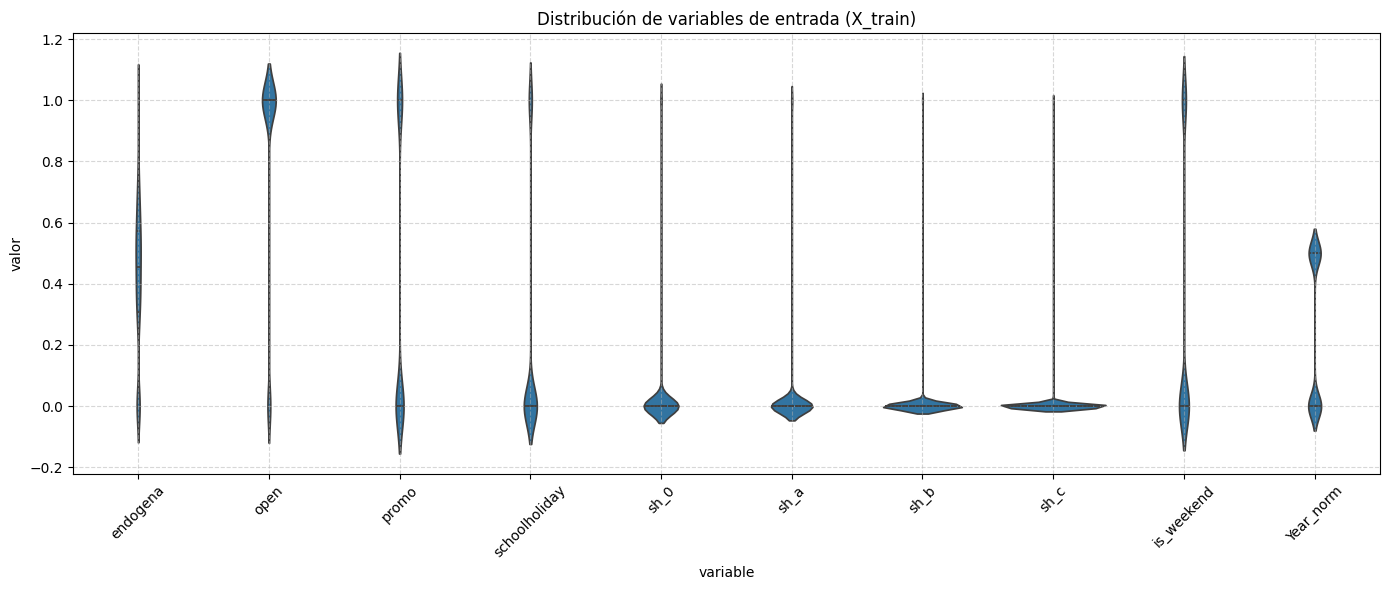

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un diccionario con las variables de entrada
dict_train = {
    "endogena": target_transf,

    "open": X4_train,
    "promo": X5_train,
    "schoolholiday": X6_train,
    "sh_0": X7_train,
    "sh_a": X8_train,
    "sh_b": X9_train,
    "sh_c": X10_train,
    "is_weekend": X11_train,
    "Year_norm": X12_train
}

# Convertimos a formato largo (long-form)
df_violin = pd.DataFrame()

for name, array in dict_train.items():
    # Aplanamos a 1D si es necesario
    flat_values = array.reshape(-1)
    temp_df = pd.DataFrame({
        "variable": name,
        "valor": flat_values
    })
    df_violin = pd.concat([df_violin, temp_df], ignore_index=True)

# Gráfica tipo violin
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_violin, x="variable", y="valor", inner="quartile")
plt.title("Distribución de variables de entrada (X_train)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
target_test = target[fcorte_pos:] # número de Sales
y_test      = y[fcorte_pos:] # número de Sales estandarizados
fechas_test = fechas[fcorte_pos:]

X0_test = X0[fcorte_pos:]
X1_test = X1[fcorte_pos:]
X2_test = X2[fcorte_pos:]
X3_test = X3[fcorte_pos:]
X4_test = X4[fcorte_pos:]
X5_test = X5[fcorte_pos:]
X6_test = X6[fcorte_pos:]
X7_test = X7[fcorte_pos:]
X8_test = X8[fcorte_pos:]
X9_test = X9[fcorte_pos:]
X10_test = X10[fcorte_pos:]
X11_test = X11[fcorte_pos:]
X12_test = X11[fcorte_pos:]


In [ ]:
X0_train.shape, X1_train.shape, X2_train.shape, X3_train.shape, X4_train.shape, X5_train.shape, X6_train.shape, X7_train.shape, X8_train.shape, X9_train.shape, X10_train.shape, X11_train.shape, X12_train.shape

((690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1),
 (690, 14, 1))

In [ ]:
X0_test.shape, X1_test.shape, X2_test.shape, X3_test.shape, X4_test.shape, X5_test.shape, X6_test.shape, X7_test.shape, X8_test.shape, X9_test.shape,
X10_test.shape, X11_test.shape, X12_test.shape

((177, 14, 1), (177, 14, 1), (177, 14, 1))

In [ ]:
627+158+5

790

In [ ]:
fecha_corte

Timestamp('2014-12-06 00:00:00')

# vamos a definir la arquitectura de la red, revisar dimensiones de cada embedding (si es categórico, cuántas categorias tiene)

In [ ]:
from keras.layers import Input, Embedding, concatenate, LSTM, Dense
from keras import Model, optimizers

# data_window = VIENE DEFINIDO DE LA CELDA DE ENVENTANADO
dim_embedding = 3
neurons_lstm  = 10
l_r           = 0.0005
opt = optimizers.RMSprop(learning_rate=l_r)

# definimos las entradas
input0 = Input(shape=(data_window, 1),  name="endogena")
input1 = Input(shape=(data_window, ),   name="mes")          #embedding 12categorias
input2 = Input(shape=(data_window, ),   name="dow")          #embedding 7categorias
input3 = Input(shape=(data_window, ),   name="day_month")     #embedding 31categorias
input4 = Input(shape=(data_window,1),    name="open")
input5 = Input(shape=(data_window,1),    name="promo")
input6 = Input(shape=(data_window,1),    name="schoolholiday")
input7 = Input(shape=(data_window,1),    name="sh_0")
input8 = Input(shape=(data_window,1),    name="sh_a")
input9 = Input(shape=(data_window,1),    name="sh_b")
input10 = Input(shape=(data_window,1),   name="sh_c")
input11 = Input(shape=(data_window,1),   name="is_weekend")
input12 = Input(shape=(data_window,1),   name="Year_norm")



#  (embeddings)
embedding1 = Embedding(input_dim=12, output_dim=dim_embedding,
                    input_length=data_window, name="embedding_mes")(input1)


embedding2 = Embedding(input_dim=7,  output_dim=dim_embedding,
                    input_length=data_window, name="embedding_dow")(input2)

embedding3 = Embedding(input_dim=31, output_dim=dim_embedding,
                    input_length=data_window, name="embedding_day_month")(input3)

# Concatenación 3D por eje de features
x = concatenate([input0, embedding1, embedding2, embedding3, input4, input5, input6, input7, input8,input9, input10, input11, input12 ])  # -> (N, W, 1+1+1+2+2)

x = LSTM(units=neurons_lstm)(x)
out = Dense(units=1)(x)



model = Model(inputs=[input0, input1, input2, input3, input4, input5, input6, input7, input8, input9, input10, input11, input12], outputs=out)
model.compile(loss="mean_squared_error", optimizer=opt,  metrics=["mae"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mes (InputLayer)    │ (None, 14)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dow (InputLayer)    │ (None, 14)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ day_month           │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ endogena            │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_mes       │ (None, 14, 3)     │         36 │ mes[0][0]         │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_dow       │ (None, 14, 3)     │         21 │ dow[0][0]         │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_day_month │ (None, 14, 3)     │         93 │ day_month[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ open (InputLayer)   │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ promo (InputLayer)  │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ schoolholiday       │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_0 (InputLayer)   │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_a (InputLayer)   │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_b (InputLayer)   │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sh_c (InputLayer)   │ (None, 14, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ is_weekend          │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Year_norm           │ (None, 14, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_18      │ (None, 14, 19)    │          0 │ endogena[0][0],   │
│ (Concatenate)       │                   │            │ embedding_mes[0]… │
│                     │                   │            │ embedding_dow[0]… │
│                     │                   │            │ embedding_day_mo… │
│                     │                   │            │ open[0][0],       │
│                     │                   │            │ promo[0][0],      │
│                     │                   │            │ schoolholiday[0]… │
│                     │                   │            │ sh_0[0][0],       │
│                     │                   │            │ sh_a[0][0],     

 Total params: 1,361 (5.32 KB)

 Trainable params: 1,361 (5.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for t in model.inputs:
    print(t.name, t.shape)


endogena (None, 14, 1)
mes (None, 14)
dow (None, 14)
day_month (None, 14)
open (None, 14, 1)
promo (None, 14, 1)
schoolholiday (None, 14, 1)
sh_0 (None, 14, 1)
sh_a (None, 14, 1)
sh_b (None, 14, 1)
sh_c (None, 14, 1)
is_weekend (None, 14, 1)
Year_norm (None, 14, 1)


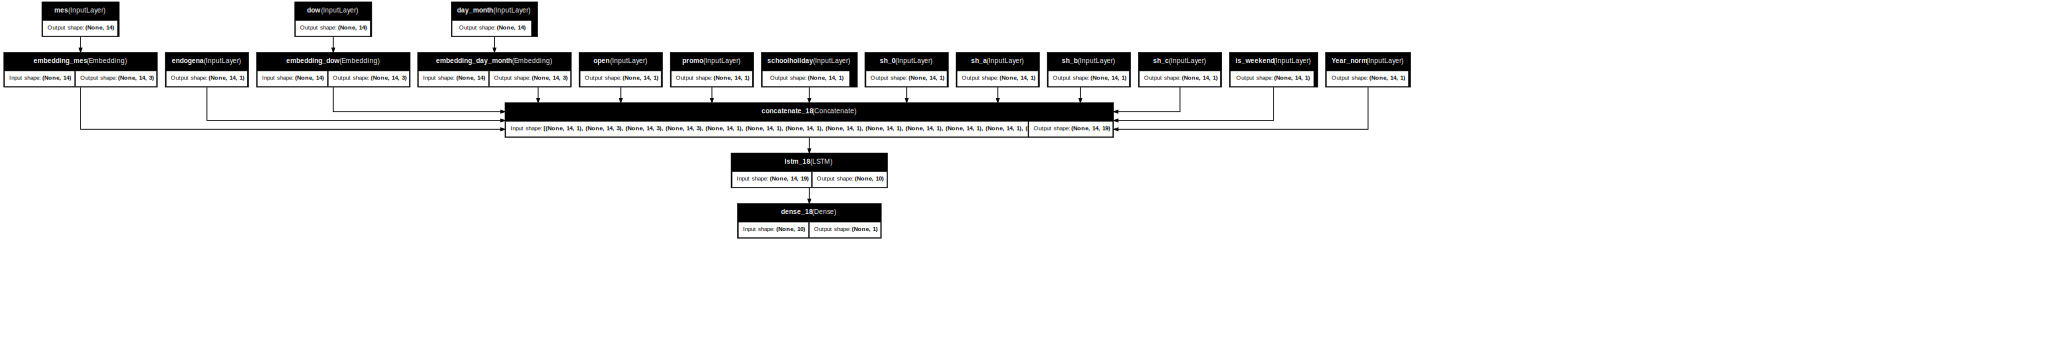

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot

if COLAB:
  display(SVG(model_to_dot(model, show_shapes=True, dpi=50).create(prog="dot",
                                                                   format="svg")))
else:
  display(SVG(model_to_dot(model, show_shapes=True).create(prog="dot",
                                                           format="svg")))

# Parámetros para el entrenamiento

In [ ]:
epochs = 300
batch_size = 32
Nval = 200 # los 200 últimos días de training los voy a usar como validación

X0_tr = X0_train[:-Nval]
X1_tr = X1_train[:-Nval]
X2_tr = X2_train[:-Nval]
X3_tr = X3_train[:-Nval]
X4_tr = X4_train[:-Nval]
X5_tr = X5_train[:-Nval]
X6_tr = X6_train[:-Nval]
X7_tr = X7_train[:-Nval]
X8_tr = X8_train[:-Nval]
X9_tr = X9_train[:-Nval]
X10_tr = X10_train[:-Nval]
X11_tr = X11_train[:-Nval]
X12_tr = X12_train[:-Nval]
y_tr  = y_train[:-Nval]

X0_va = X0_train[-Nval:]
X1_va = X1_train[-Nval:]
X2_va = X2_train[-Nval:]
X3_va = X3_train[-Nval:]
X4_va = X4_train[-Nval:]
X5_va = X5_train[-Nval:]
X6_va = X6_train[-Nval:]
X7_va = X7_train[-Nval:]
X8_va = X8_train[-Nval:]
X9_va = X9_train[-Nval:]
X10_va = X10_train[-Nval:]
X11_va = X11_train[-Nval:]
X12_va = X12_train[-Nval:]
y_va  = y_train[-Nval:]

In [ ]:
#Creación de diccionarios
tr_loss_history = []
va_loss_history = []

modelpath = "best_model.h5" # fichero en el que guardaré el mejor modelo
checkpoint = ModelCheckpoint(modelpath, monitor="val_loss", verbose=2, save_best_only=True)

Xs_tr = {
    "endogena":   X0_tr,
    "mes":        X1_tr,
    "dow":        X2_tr,
    "day_month":  X3_tr,
    "open":       X4_tr,
    "promo":      X5_tr,
    "schoolholiday": X6_tr,
    "sh_0":       X7_tr,
    "sh_a":       X8_tr,
    "sh_b":       X9_tr,
    "sh_c":       X10_tr,
    "is_weekend": X11_tr,
    "Year_norm":  X12_tr
}

Xs_va = {
    "endogena": X0_va,
    "mes": X1_va,
    "dow": X2_va,
    "day_month": X3_va,
    "open": X4_va,
    "promo": X5_va,
    "schoolholiday": X6_va,
    "sh_0": X7_va,
    "sh_a": X8_va,
    "sh_b": X9_va,
    "sh_c": X10_va,
    "is_weekend": X11_va,
    "Year_norm": X12_va
}

Xs_test = {
    "endogena": X0_test,
    "mes": X1_test,
    "dow": X2_test,
    "day_month": X3_test,
    "open": X4_test,
    "promo": X5_test,
    "schoolholiday": X6_test,
    "sh_0": X7_test,
    "sh_a": X8_test,
    "sh_b": X9_test,
    "sh_c": X10_test,
    "is_weekend": X11_test,
    "Year_norm": X12_test
}


Epoch 1: val_loss improved from inf to 0.04456, saving model to best_model.h5


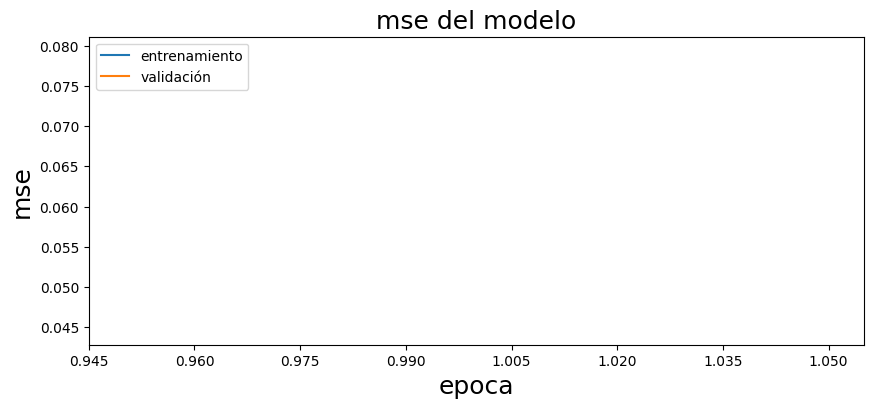

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss improved from 0.04456 to 0.04017, saving model to best_model.h5



Epoch 1: val_loss improved from 0.04017 to 0.03637, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03637 to 0.03288, saving model to best_model.h5



Epoch 1: val_loss improved from 0.03288 to 0.02970, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02970 to 0.02678, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02678 to 0.02409, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02409 to 0.02161, saving model to best_model.h5



Epoch 1: val_loss improved from 0.02161 to 0.01932, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01932 to 0.01724, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01724 to 0.01536, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01536 to 0.01371, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01371 to 0.01230, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01230 to 0.01113, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01113 to 0.01018, saving model to best_model.h5



Epoch 1: val_loss improved from 0.01018 to 0.00945, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00945 to 0.00888, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00888 to 0.00844, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00844 to 0.00809, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00809 to 0.00780, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00780 to 0.00755, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00755 to 0.00732, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00732 to 0.00713, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00713 to 0.00696, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00696 to 0.00682, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00682 to 0.00671, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00671 to 0.00662, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00662 to 0.00655, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00655 to 0.00650, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00650 to 0.00646, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00646 to 0.00643, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00643 to 0.00641, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00641 to 0.00640, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00640 to 0.00638, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00638 to 0.00638, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00638 to 0.00637, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00637 to 0.00636, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00636 to 0.00635, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00635 to 0.00634, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00634 to 0.00633, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00633 to 0.00632, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00632 to 0.00631, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00631 to 0.00629, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00629 to 0.00628, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00628 to 0.00626, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00626 to 0.00625, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00625 to 0.00623, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00623 to 0.00621, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00621 to 0.00618, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00618 to 0.00616, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00616 to 0.00614, saving model to best_model.h5


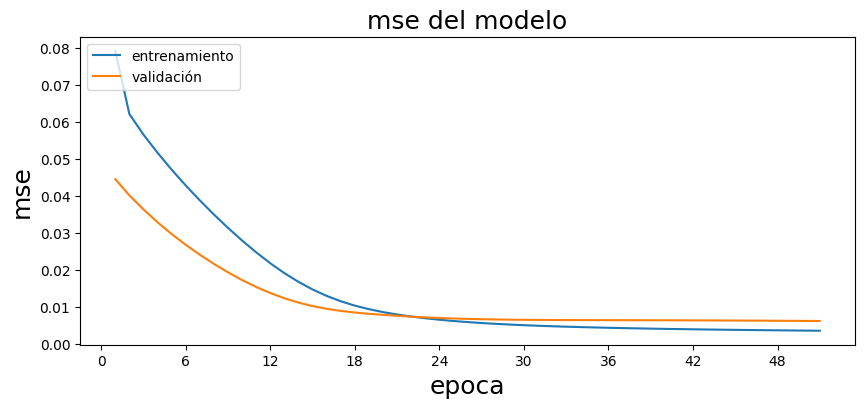

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss improved from 0.00614 to 0.00612, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00612 to 0.00609, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00609 to 0.00607, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00607 to 0.00604, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00604 to 0.00602, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00602 to 0.00600, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00600 to 0.00597, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00597 to 0.00595, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00595 to 0.00592, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00592 to 0.00590, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00590 to 0.00587, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00587 to 0.00585, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00585 to 0.00582, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00582 to 0.00580, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00580 to 0.00577, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00577 to 0.00575, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00575 to 0.00573, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00573 to 0.00570, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00570 to 0.00568, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00568 to 0.00566, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00566 to 0.00564, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00564 to 0.00561, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00561 to 0.00559, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00559 to 0.00557, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00557 to 0.00555, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00555 to 0.00553, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00553 to 0.00551, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00551 to 0.00549, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00549 to 0.00547, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00547 to 0.00545, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00545 to 0.00543, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00543 to 0.00541, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00541 to 0.00539, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00539 to 0.00537, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00537 to 0.00535, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00535 to 0.00533, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00533 to 0.00532, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00532 to 0.00530, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00530 to 0.00528, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00528 to 0.00527, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00527 to 0.00525, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00525 to 0.00524, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00524 to 0.00522, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00522 to 0.00521, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00521 to 0.00519, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00519 to 0.00518, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00518 to 0.00516, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00516 to 0.00515, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00515 to 0.00514, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00514 to 0.00513, saving model to best_model.h5


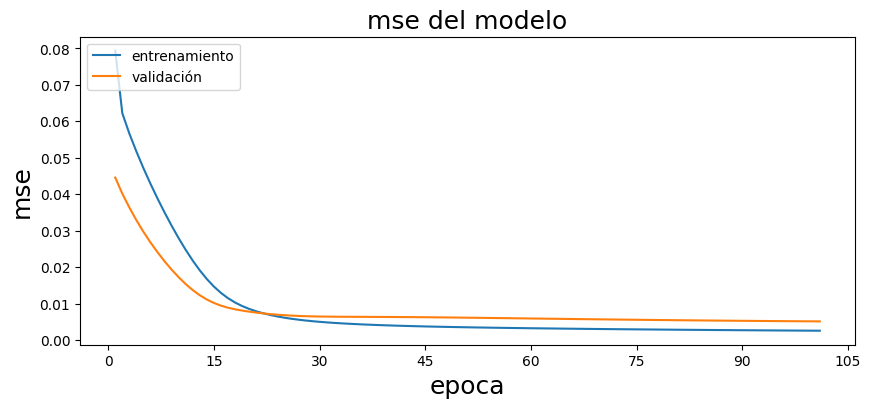

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss improved from 0.00513 to 0.00511, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00511 to 0.00510, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00510 to 0.00509, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00509 to 0.00508, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00508 to 0.00507, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00507 to 0.00506, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00506 to 0.00505, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00505 to 0.00504, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00504 to 0.00503, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00503 to 0.00502, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00502 to 0.00501, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00501 to 0.00500, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00500 to 0.00500, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00500 to 0.00499, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00499 to 0.00498, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00498 to 0.00498, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00498 to 0.00497, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00497 to 0.00496, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00496 to 0.00496, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00496 to 0.00495, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00495 to 0.00495, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00495 to 0.00494, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00494 to 0.00494, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00494 to 0.00493, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00493 to 0.00493, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00493 to 0.00492, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00492 to 0.00492, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00492 to 0.00492, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00492 to 0.00491, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00491 to 0.00491, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00491 to 0.00491, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00491 to 0.00490, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00490 to 0.00490, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00490 to 0.00490, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00490 to 0.00490, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00490 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss improved from 0.00489 to 0.00489, saving model to best_model.h5



Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489


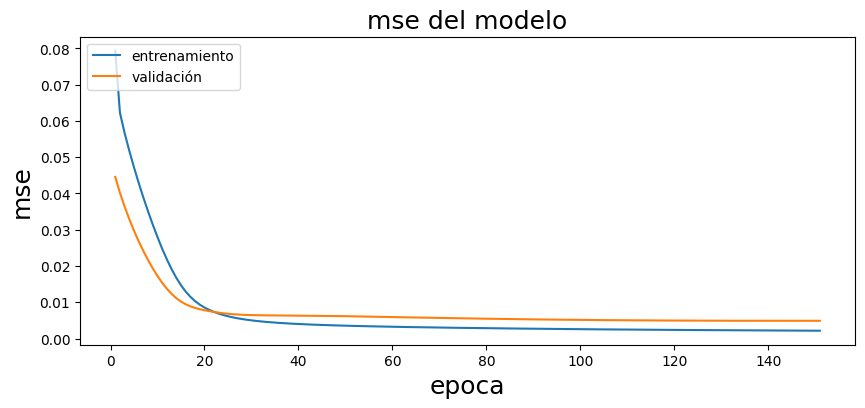

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not im

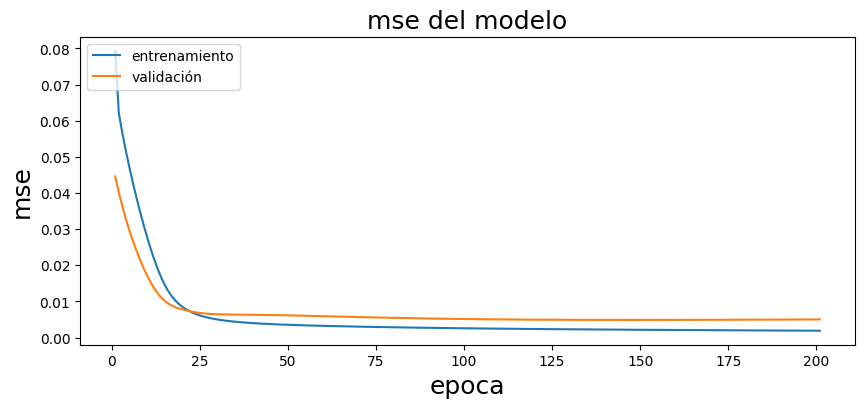

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not im

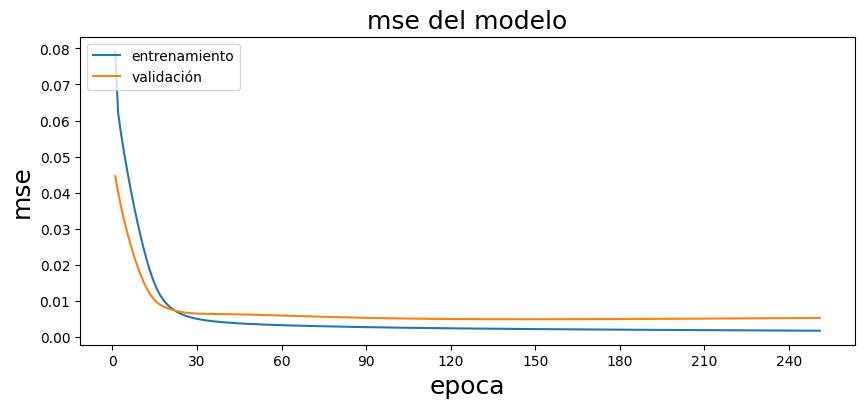

Parámetros: window_size=14, batch_size=32, dim_embedding=3

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not improve from 0.00489

Epoch 1: val_loss did not im

In [ ]:
for e in range(epochs):
  history = model.fit(Xs_tr, y_tr, batch_size=batch_size, epochs=1,
                      callbacks=[checkpoint], verbose=0, validation_data=(Xs_va, y_va))
  tr_loss_history += history.history["loss"]
  va_loss_history += history.history["val_loss"]
  if e%50 == 0:
    grafica_entrenamiento(tr_loss_history, va_loss_history)
    print(f"Parámetros: window_size={data_window}, batch_size={batch_size}, dim_embedding={dim_embedding}")


In [ ]:
model = load_model(modelpath)

In [ ]:
y_tr_prediction = model.predict(Xs_tr, verbose=0)

In [ ]:
y_va_prediction = model.predict(Xs_va, verbose=0)

In [ ]:
y_test_prediction = model.predict(Xs_test, verbose=0)

In [ ]:
target_tr_pred = scaler.inverse_transform(y_tr_prediction).flatten() # des-estandarización de los pasajeros
target_va_pred = scaler.inverse_transform(y_va_prediction).flatten()
target_test_pred = scaler.inverse_transform(y_test_prediction).flatten()

In [ ]:
# antes separé y_train en y_tr e y_va (estandarizados),
# pero no hice lo mismo con target_train (sin estandarizar)
# Ahora lo hago:
fechas_tr = fechas_train[:len(y_tr)]
fechas_va = fechas_train[len(y_tr):]
target_tr = target_train[:len(y_tr)]
target_va = target_train[len(y_tr):]

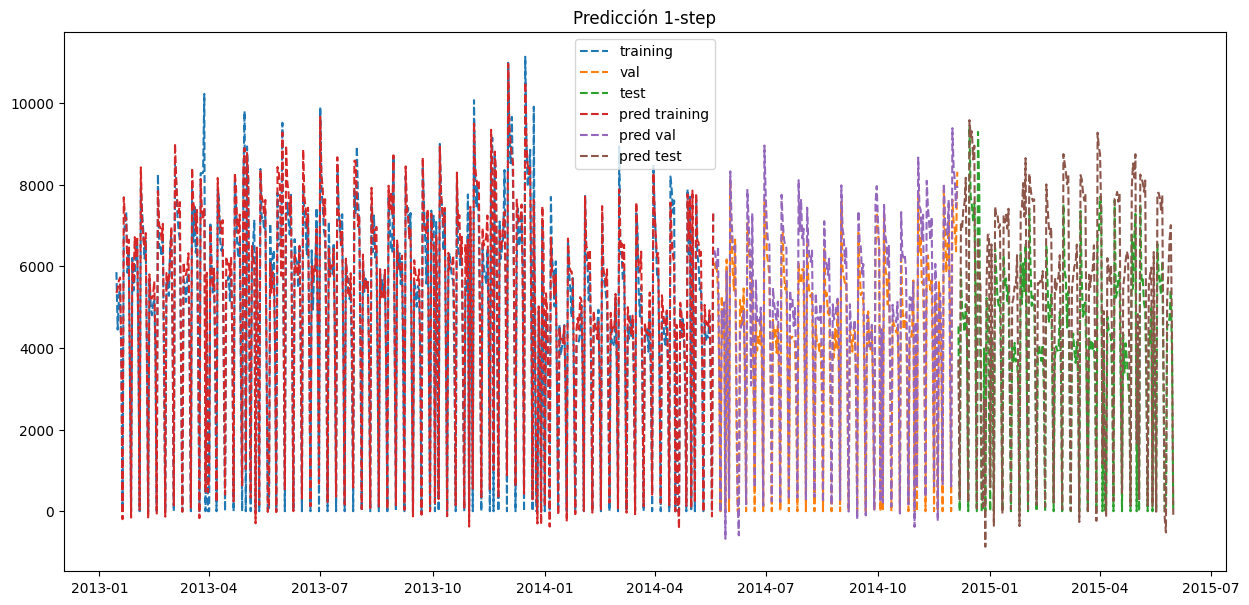

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_tr, target_tr, '--', label="training")
plt.plot(fechas_va, target_va, '--', label="val")
plt.plot(fechas_test, target_test, '--', label="test")
plt.plot(fechas_tr, target_tr_pred, '--', label="pred training")
plt.plot(fechas_va, target_va_pred, '--', label="pred val")
plt.plot(fechas_test, target_test_pred, '--', label="pred test")
plt.legend()
plt.title("Predicción 1-step");

In [ ]:
!cal 9 2016

/bin/bash: line 1: cal: command not found


In [ ]:
fechas_test[0]

np.datetime64('2014-12-06T00:00:00.000000000')

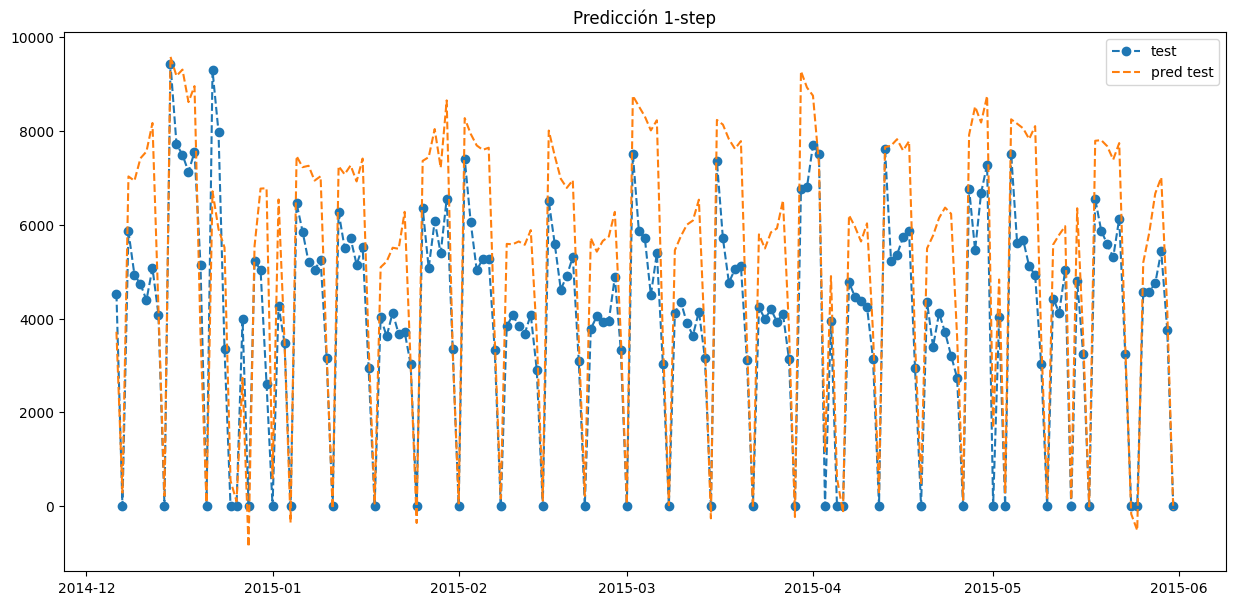

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--o', label="test")
plt.plot(fechas_test, target_test_pred, '--', label="pred test")
plt.legend()
plt.title("Predicción 1-step");

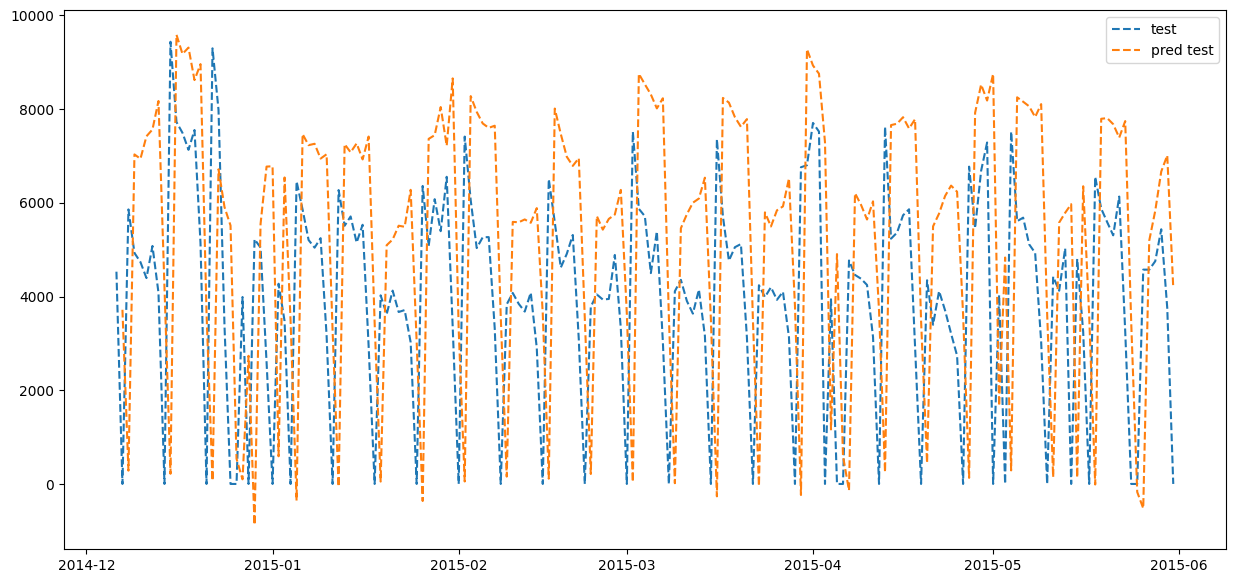

In [ ]:
# esto es lo que daría si el modelo no tuviera ni idea (predice mañana lo mismo que hoy, "MODELO PERSISTENTE A 1 DÍA")

plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--', label="test")
plt.plot(fechas_test[1:], target_test_pred[:-1], '--', label="pred test")
plt.legend();

In [ ]:
R2_va = R2_score(target_tr, target_tr_pred)
R2_tr = R2_score(target_va, target_va_pred)
R2_ts = R2_score(target_test, target_test_pred)
print("R2 en training: {}".format(R2_tr))
print("R2 en val: {}".format(R2_va))
print("R2 en test: {}".format(R2_ts))

R2 en training: 0.8782795597282138
R2 en val: 0.9599852237420554
R2 en test: 0.49779697608022755


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

MSE_tr = MSE(target_tr, target_tr_pred)
MSE_va = MSE(target_va, target_va_pred)
MSE_ts = MSE(target_test, target_test_pred)
print("MSE en training: {}".format(MSE_tr))
print("MSE en val: {}".format(MSE_va))
print("MSE en test: {}".format(MSE_ts))

MSE en training: 290795.42582566524
MSE en val: 606299.6400248489
MSE en test: 2699478.8297219574


R2 en test de modelo persistente a 1 días: -1.5046235371992043
R2 en test de modelo persistente a 2 días: -2.321825449106948
R2 en test de modelo persistente a 3 días: -2.1836594385114427
R2 en test de modelo persistente a 4 días: -2.30557608406478
R2 en test de modelo persistente a 5 días: -2.1670482027874787
R2 en test de modelo persistente a 6 días: -1.7005478922238026
R2 en test de modelo persistente a 7 días: -0.42459165899931484
R2 en test de modelo persistente a 8 días: -1.8363558725897233
R2 en test de modelo persistente a 9 días: -2.5707467488783395
R2 en test de modelo persistente a 10 días: -2.512954839202799
R2 en test de modelo persistente a 11 días: -2.3715509314186156
R2 en test de modelo persistente a 12 días: -2.2999036129192905
R2 en test de modelo persistente a 13 días: -1.7966897511590951
R2 en test de modelo persistente a 14 días: -0.41390324879876395
R2 en test de modelo persistente a 15 días: -1.8901348049308933
R2 en test de modelo persistente a 16 días: -2.6525

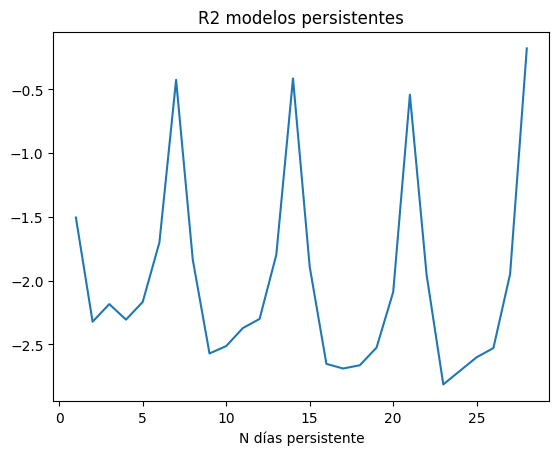

In [ ]:
# Extraigo métricas de diferentes modelos persistentes a N días:

R2_persistentes = []
rango = range(1, 4*7+1)
for i in rango:
  score = R2_score(target_test[i:], target_test_pred[:-i])
  R2_persistentes.append(score)
  print("R2 en test de modelo persistente a {} días: {}".format(i, score))

plt.plot(rango, R2_persistentes)
plt.title("R2 modelos persistentes")
plt.xlabel("N días persistente");

Codigo para visualizar embedding, atención si se cambia la dimension de embedding como hiperparámetros  empedding_mes[ ]   y en coords   

In [ ]:
embeddings_mes = model.get_layer("embedding_mes").get_weights()[0]
embeddings_mes.shape

(12, 3)

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(embeddings_mes[:,0], embeddings_mes[:,1], "o")
nombres = ["ene","feb","mar","abr","may","jun","jul","ago","sep","oct","nov","dic"]
for coords,nombre in zip(embeddings_mes,nombres):
  plt.text(coords[0],coords[1],nombre)

NameError: name 'plt' is not defined

In [ ]:
embeddings_dow = model.get_layer("embedding_dow").get_weights()[0]
embeddings_dow.shape

(7, 3)

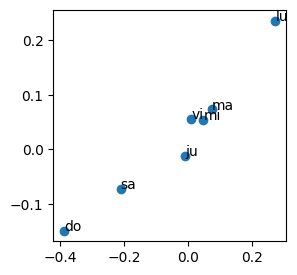

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(embeddings_dow[:,0], embeddings_dow[:,1], "o")
nombres = ["lu","ma","mi","ju","vi","sa","do"]
for coords,nombre in zip(embeddings_dow,nombres):
  plt.text(coords[0],coords[1],nombre)

In [ ]:
embeddings_day_month = model.get_layer("embedding_day_month").get_weights()[0]
embeddings_day_month.shape

(31, 3)

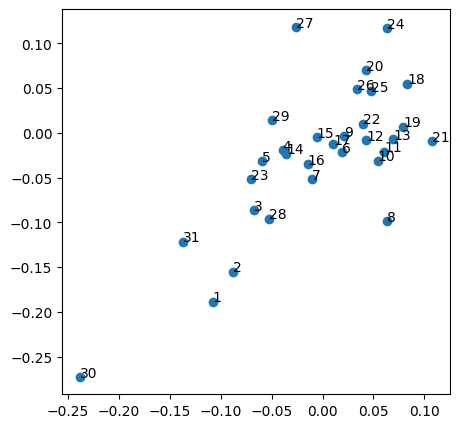

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(embeddings_day_month[:,0], embeddings_day_month[:,1], "o")
nombres = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21", "22", "23", "24", "25","26", "27","28","29","30","31" ]
for coords,nombre in zip(embeddings_day_month,nombres):
  plt.text(coords[0],coords[1],nombre)

In [ ]:
def multistep(model, Xs): # el número de ventanas en Xs = número de días hacia delante que quiero predecir
  ventana_endogena = Xs["endogena"][:1].copy()
  salidas = []
  for i in range(len(Xs["open"])):
    z = model.predict( # predigo un solo día (día i)
        {
            "endogena": ventana_endogena,
            "mes": Xs["mes"][i:(i+1)],
            "dow": Xs["dow"][i:(i+1)],
            "day_month": Xs["day_month"][i:(i+1)],
            "open": Xs["open"][i:(i+1)],
            "promo": Xs["promo"][i:(i+1)],
            "schoolholiday": Xs["schoolholiday"][i:(i+1)],
            "sh_0": Xs["sh_0"][i:(i+1)],
            "sh_a": Xs["sh_a"][i:(i+1)],
            "sh_b": Xs["sh_b"][i:(i+1)],
            "sh_c": Xs["sh_c"][i:(i+1)],
            "is_weekend": Xs["is_weekend"][i:(i+1)],
            "Year_norm": Xs["Year_norm"][i:(i+1)]
        }, verbose=0
    )
    ventana_endogena[:-1] = ventana_endogena[1:] # desplazo un día la ventana
    ventana_endogena[-1]  = z[0][0] # predicción
    salidas.append(scaler.inverse_transform(z)[0,0])

  return salidas

In [ ]:
Xs_test["endogena"][0]

array([[0.31977736],
       [0.        ],
       [0.70715504],
       [0.62608852],
       [0.52563067],
       [0.57383966],
       [0.6435048 ],
       [0.45829967],
       [0.        ],
       [0.6856989 ],
       [0.63668193],
       [0.61998384],
       [0.57195439],
       [0.74692522]])

In [ ]:
Xs_test["endogena"][1]

array([[0.        ],
       [0.70715504],
       [0.62608852],
       [0.52563067],
       [0.57383966],
       [0.6435048 ],
       [0.45829967],
       [0.        ],
       [0.6856989 ],
       [0.63668193],
       [0.61998384],
       [0.57195439],
       [0.74692522],
       [0.40667924]])

In [ ]:
Xs_test["endogena"][0].shape

(14, 1)

In [ ]:
sal = multistep(model, Xs_test)

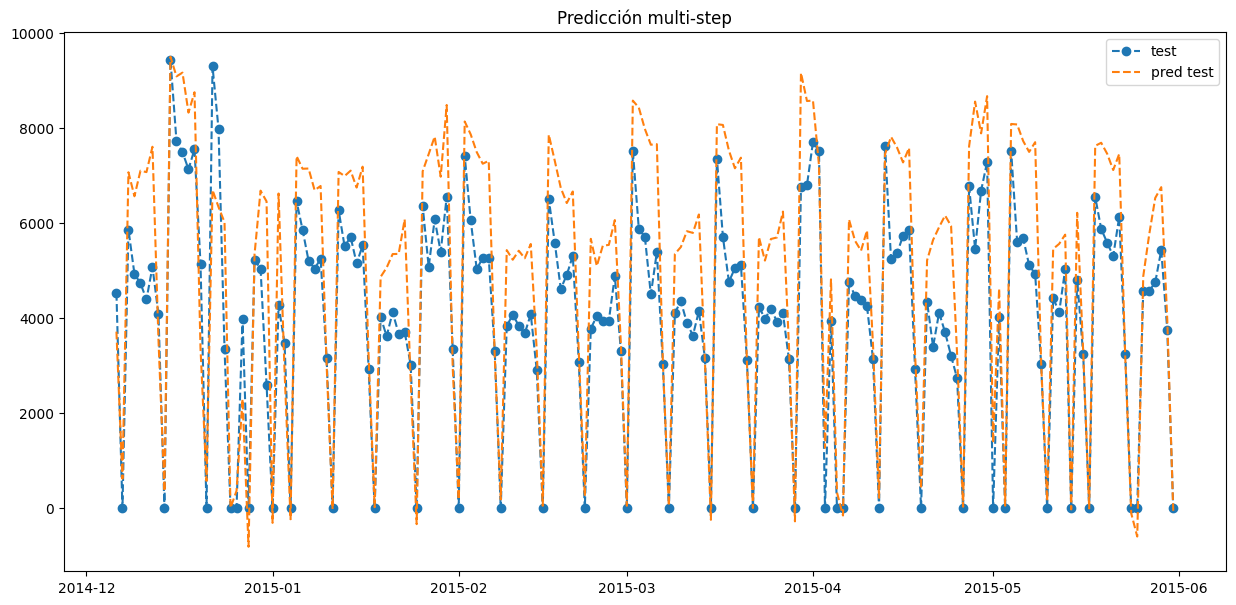

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(fechas_test, target_test, '--o', label="test")
plt.plot(fechas_test, sal, '--', label="pred test")
plt.legend()
plt.title("Predicción multi-step");

Calculamos el R2_score para multi-step

In [ ]:
R2_multi_step_14 = R2_score(target_test[:14], sal[:14])
R2_multi_step_14

0.6639248099352388

In [ ]:
# Inicializa la lista una sola vez antes del bucle (o ejecuciones sucesivas)

try:
    historial_resultados
except NameError:
    historial_resultados = []


historial_resultados.append({
    "R2_va": round(R2_va, 4),
    "R2_multi_step_14": round(R2_multi_step_14, 4),
    "R2_train": round(R2_tr, 4),
    "R2_test": round(R2_ts, 4),
    "R2_validation": round(R2_va, 4),
    "MSE_tr": round(MSE_tr, 4),
    "MSE_va": round(MSE_va, 4),
    "MSE_ts": round(MSE_ts, 4),
    "data_window": data_window,
    "dim_embedding": dim_embedding,
    "neurons_lstm": neurons_lstm,
    "l_r": l_r,
    "opt": opt.__class__.__name__,
    "batch_size": batch_size,
    "epochs": epochs
})

import pandas as pd
df_resultados = pd.DataFrame(historial_resultados)

display(df_resultados)


,R2_va,R2_multi_step_14,R2_train,R2_test,R2_validation,MSE_tr,MSE_va,MSE_ts,data_window,dim_embedding,neurons_lstm,l_r,opt,batch_size,epochs
0,0.9523,0.8109,0.9430,0.8125,0.9523,345357.7918,283980.4614,1.007734e+06,7,2,5,0.0005,RMSprop,32,300
1,0.9523,0.8109,0.9430,0.8125,0.9523,345357.7918,283980.4614,1.007734e+06,7,2,5,0.0005,RMSprop,32,300
2,0.9523,0.8109,0.9430,0.8125,0.9523,345357.7918,283980.4614,1.007734e+06,7,2,5,0.0005,RMSprop,32,300
3,0.9523,0.8109,0.9430,0.8125,0.9523,345357.7918,283980.4614,1.007734e+06,7,2,5,0.0005,RMSprop,32,300
4,0.9647,0.6256,0.9424,0.6110,0.9647,255393.7794,287002.2796,2.091181e+06,7,3,5,0.0005,RMSprop,32,300
5,0.9567,0.8034,0.9419,0.7658,0.9567,313701.7484,289461.8632,1.258929e+06,7,2,5,0.0005,RMSprop,32,300
6,0.9567,0.8034,0.9419,0.7658,0.9567,313701.7484,289461.8632,1.258929e+06,7,2,5,0.0005,RMSprop,32,300
7,0.9606,0.7998,0.9479,0.8643,0.9606,285620.9436,259556.6726,7.293363e+05,7,2,5,0.0005,RMSprop,32,300
8,0.9551,0.9157,0.9419,0.8480,0.9551,326654.8875,289618.8806,8.169901e+05,14,2,5,0.0005,RMSprop,32,300
9,0.9599,0.8969,0.9488,0.8806,0.9599,291141.5377,255037.6408,6.416131e+05,14,3,5,0.0005,RMSprop,32,300


In [ ]:

df_resultados.to_csv("/content/drive/MyDrive/PC4/data/resultados_modelosT1.csv", index=False)

A continuación después de varias iteraciones cambiando los hiperparametros:
  

*  data_window (contexto del información de la ventada de entrada a la lstm)
*  dim_embedding (características de información de tiempo vs Sales)
*  batch_size
*  neuronas para la res lstm

Se obtuvo la siguiente tabla.

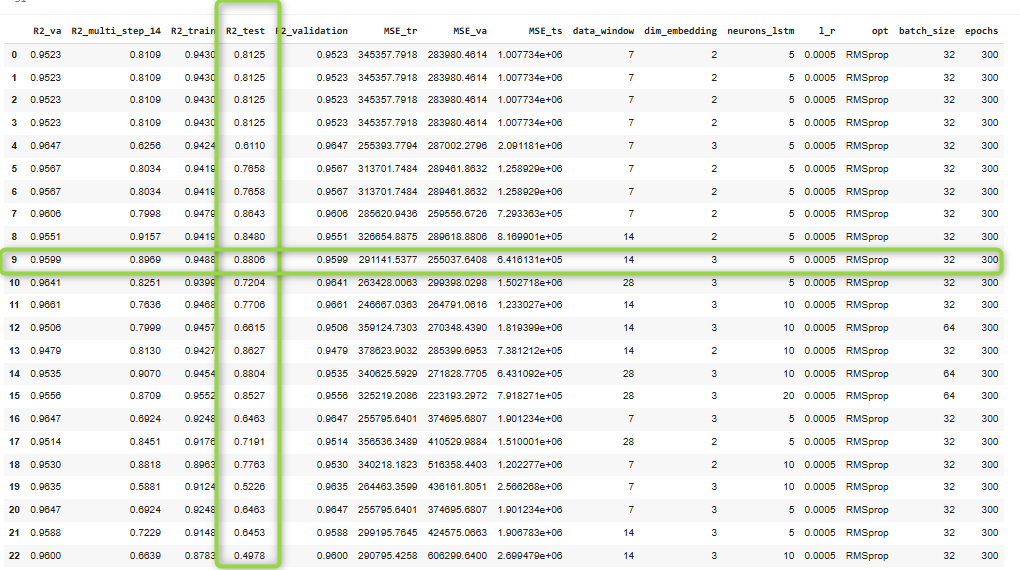